# Machine Learning, Spring 2023: Project 3

### KAMAL SUBEDI (G35111003) 


#### Dataset : https://www.kaggle.com/datasets/mboaglio/simplifiedhuarus?datasetId=8630&searchQuery=means+pac

##### Dataset Description: This dataset is about human activity recognition using smartphones data Set contains 3609 data points with 563 features. It builts from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually.

Platform: Jupyter Notebook

Device: MacOS M2

Programming language: Python3, Python libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, silhouette_score
from sklearn.decomposition import PCA

In [156]:
data = pd.read_csv("train.csv")

In [157]:
data.head(10)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.2790,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.21300,-0.2310,0.01460,-0.19000,-0.852,0.1820,-0.0430
1,11,STANDING,0.2770,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.08070,0.5960,-0.47600,0.11600,-0.852,0.1880,-0.0347
2,14,STANDING,0.2770,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.10600,-0.0903,-0.13200,0.49900,-0.850,0.1890,-0.0351
3,15,STANDING,0.2980,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.06230,-0.0587,0.03120,-0.26900,-0.731,0.2830,0.0364
4,20,STANDING,0.2760,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.24500,0.1030,0.06610,-0.41200,-0.761,0.2630,0.0296
5,21,STANDING,0.2780,-0.0143,-0.1080,-0.998,-0.994,-0.996,-0.998,-0.994,...,0.601,-0.834,-0.9690,0.16100,0.1980,0.25800,-0.38100,-0.761,0.2630,0.0303
6,22,STANDING,0.2770,-0.0180,-0.1070,-0.998,-0.990,-0.997,-0.998,-0.990,...,0.576,-0.848,-0.9500,-0.00232,0.1500,0.14200,-0.85400,-0.762,0.2620,0.0300
7,24,STANDING,0.2790,-0.0177,-0.1090,-0.998,-0.987,-0.991,-0.999,-0.987,...,0.468,-0.910,-0.9870,-0.54300,-0.2500,0.00699,-0.23500,-0.759,0.2640,0.0305
8,31,SITTING,0.2220,0.0341,-0.1240,-0.815,-0.749,-0.572,-0.879,-0.777,...,-0.464,0.743,0.5970,0.17900,0.0776,0.05630,-0.31700,-0.583,-0.0208,-0.2550
9,32,SITTING,-0.0417,0.1750,0.0256,-0.758,-0.587,-0.439,-0.774,-0.555,...,-0.255,0.482,0.2560,0.11500,0.1140,-0.07080,-0.00146,-0.553,-0.0535,-0.2600


In [125]:
#print the no of rows and columns
data.shape

(3609, 563)

In [127]:
data.columns

Index(['rn', 'activity', 'tBodyAcc.mean.X', 'tBodyAcc.mean.Y',
       'tBodyAcc.mean.Z', 'tBodyAcc.std.X', 'tBodyAcc.std.Y', 'tBodyAcc.std.Z',
       'tBodyAcc.mad.X', 'tBodyAcc.mad.Y',
       ...
       'fBodyBodyGyroJerkMag.meanFreq', 'fBodyBodyGyroJerkMag.skewness',
       'fBodyBodyGyroJerkMag.kurtosis', 'angle.tBodyAccMean.gravity',
       'angle.tBodyAccJerkMean.gravityMean', 'angle.tBodyGyroMean.gravityMean',
       'angle.tBodyGyroJerkMean.gravityMean', 'angle.X.gravityMean',
       'angle.Y.gravityMean', 'angle.Z.gravityMean'],
      dtype='object', length=563)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [129]:
#Check whether any feature has null value or not
data.isnull().sum()  

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [130]:
data.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [131]:
data.corr()

/var/folders/nf/gjk1b0x54993dfl5m_49xrp00000gn/T/ipykernel_20028/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
rn,1.000000,-0.004802,-0.008770,-0.009819,-0.028609,-0.035308,-0.029763,-0.030839,-0.033197,-0.033279,...,0.001352,0.018748,0.017398,-0.003656,0.009594,0.026851,0.007878,0.011733,-0.000399,-0.030607
tBodyAcc.mean.X,-0.004802,1.000000,0.216780,-0.302976,0.026776,-0.000438,-0.018657,0.033594,-0.001558,-0.021714,...,0.024893,-0.003043,-0.003782,-0.567714,0.017247,0.038627,0.035722,-0.027148,0.033745,0.025944
tBodyAcc.mean.Y,-0.008770,0.216780,1.000000,-0.104570,-0.053585,-0.042304,-0.049965,-0.052898,-0.040302,-0.051028,...,-0.023401,-0.005899,-0.010752,0.069540,-0.038813,0.005894,0.063621,0.004787,0.008051,-0.033470
tBodyAcc.mean.Z,-0.009819,-0.302976,-0.104570,1.000000,-0.041524,-0.027381,-0.020481,-0.041622,-0.025929,-0.014602,...,-0.020979,0.015779,0.015887,0.051885,-0.051859,-0.059418,-0.023572,0.013846,-0.019847,-0.031661
tBodyAcc.std.X,-0.028609,0.026776,-0.053585,-0.041524,1.000000,0.924174,0.867681,0.998675,0.917302,0.862121,...,-0.078044,0.166553,0.133087,-0.046226,-0.009885,0.048096,-0.028095,-0.374337,0.450522,0.389663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
angle.tBodyGyroMean.gravityMean,0.026851,0.038627,0.005894,-0.059418,0.048096,0.021625,0.008520,0.049253,0.015224,0.003334,...,-0.047721,0.056767,0.050928,-0.035379,0.016817,1.000000,-0.119781,-0.029425,0.010517,-0.000109
angle.tBodyGyroJerkMean.gravityMean,0.007878,0.035722,0.063621,-0.023572,-0.028095,-0.013066,-0.012612,-0.028363,-0.010347,-0.012639,...,-0.008656,0.012094,0.014049,-0.024574,0.025604,-0.119781,1.000000,0.025347,-0.020039,-0.017306
angle.X.gravityMean,0.011733,-0.027148,0.004787,0.013846,-0.374337,-0.382716,-0.351522,-0.371247,-0.380449,-0.353936,...,0.119005,-0.099550,-0.090157,0.006678,0.023900,-0.029425,0.025347,1.000000,-0.760618,-0.611752
angle.Y.gravityMean,-0.000399,0.033745,0.008051,-0.019847,0.450522,0.505802,0.458505,0.446229,0.508161,0.460364,...,-0.128645,0.094502,0.080422,-0.004218,-0.019456,0.010517,-0.020039,-0.760618,1.000000,0.552356


In [132]:
start = time.process_time()
#drop rn and activity feature from dataset for feature variable and label the target varible by just taking activity entity. 
Feature=data.drop(['rn','activity'],axis=1)
target=data["activity"]
y= np.array(target)

In [133]:
#Standarized the Feature variable
X_MIN_MAX = MinMaxScaler().fit_transform(Feature.values)
X_normalized = StandardScaler().fit_transform(X_MIN_MAX)
#X_normalized.shape
X_normalized

array([[ 0.07008998, -0.05130281, -0.01432096, ..., -0.69712768,
         0.39182231,  0.02729073],
       [ 0.03863356,  0.1107345 ,  0.1102126 , ..., -0.69712768,
         0.41109853,  0.05874224],
       [ 0.03863356,  0.06376716,  0.03905057, ..., -0.69320045,
         0.41431123,  0.0572265 ],
       ...,
       [ 0.14873103,  0.22204708, -0.17443554, ..., -0.31422328,
         0.68096551,  0.88368102],
       [-1.06234107,  0.98667531,  0.09242209, ..., -0.31422328,
         0.664902  ,  0.90262771],
       [ 1.86310581, -0.00903221,  0.33793112, ..., -0.60876512,
         0.41752393,  0.63737408]])

In [134]:
# Determine inertia values for k=1 to 10
inertia=[]
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(Feature)
    inertia.append(model.inertia_)

/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/k

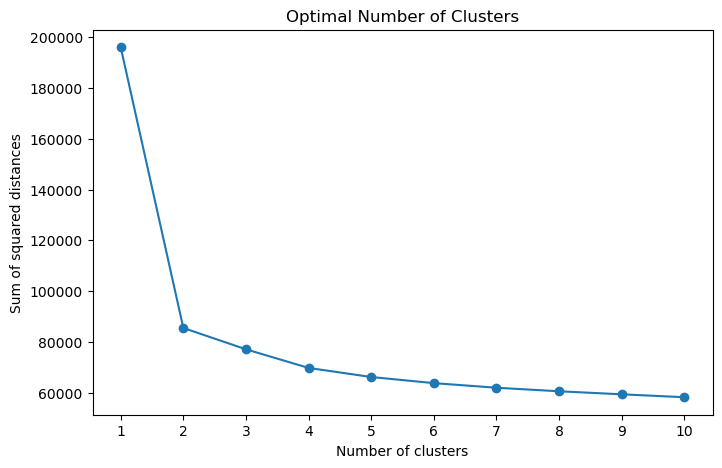

In [135]:
# Plot inertia values to determine optimal number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range(1, 11))
plt.title('Optimal Number of Clusters')
plt.show()

#### Here we can see that model gives the better inertia when cluster, k=2. So, the optimal number of cluster is 2. The good model is that which has low inertia and low number of clusters which is basically K. 


In [136]:
import pandas as pd
from sklearn.cluster import KMeans



def custom_k_means(n, data, labels):
    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data)
    predicted_labels = kmeans.predict(data)
    
    # Create a new DataFrame with the predicted and true labels
    df = pd.DataFrame({'predicted_labels': predicted_labels, 'original_labels': labels.tolist()})
    
    # Compute and print the crosstab of the predicted and true labels
    crosstab = pd.crosstab(df['predicted_labels'], df['original_labels'])
    print('Crosstab:\n', crosstab, '\n')
    
    # Compute and print the performance metrics
    homogeneity = homogeneity_score(labels, predicted_labels)
    completeness = completeness_score(labels, predicted_labels)
    v_measure = v_measure_score(labels, predicted_labels)
    silhouette = silhouette_score(data, predicted_labels)
    
    print('Performance metrics:')
    print(f'Inertia: {kmeans.inertia_:.3f}')
    print(f'Homogeneity: {homogeneity:.3f}')
    print(f'Completeness: {completeness:.3f}')
    print(f'V-Measure: {v_measure:.3f}')
    print(f'Silhouette Score: {silhouette:.3f}')

In [137]:
custom_k_means(n=2, data=Feature, labels=y)

/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Crosstab:
 original_labels   LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
predicted_labels                                                           
0                    680      622       668        0                   0   
1                      1        1         0      603                 493   

original_labels   WALKING_UPSTAIRS  
predicted_labels                    
0                                0  
1                              541   

Performance metrics:
Inertia: 85475.326
Homogeneity: 0.384
Completeness: 0.994
V-Measure: 0.553
Silhouette Score: 0.477


As you can see here that, it classify for the moving and non-moving human activity as you can see that 0 and 1 with the silhouette score of 0.477

In [138]:
custom_k_means(n=4, data=Feature, labels=y)

/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Crosstab:
 original_labels   LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
predicted_labels                                                           
0                      0        0         0      192                 355   
1                      0      601       665        0                   0   
2                    678       18         0        0                   0   
3                      3        4         3      411                 138   

original_labels   WALKING_UPSTAIRS  
predicted_labels                    
0                               68  
1                                0  
2                                0  
3                              473   

Performance metrics:
Inertia: 69727.593
Homogeneity: 0.595
Completeness: 0.790
V-Measure: 0.679
Silhouette Score: 0.191


In [139]:
custom_k_means(n=8, data=Feature, labels=y)

/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Crosstab:
 original_labels   LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
predicted_labels                                                           
0                    385       13         0        0                   0   
1                      0        0         0      361                  39   
2                      1        1         0       37                  52   
3                    295        8         0        0                   0   
4                      0      415       421        0                   0   
5                      0        0         0      175                 306   
6                      0      186       247        0                   0   
7                      0        0         0       30                  96   

original_labels   WALKING_UPSTAIRS  
predicted_labels                    
0                                0  
1                                9  
2                              434  
3                                0  
4     

#### It's not showing better accuracy for other k values. It is getting worse as we increase the k value. so optimal k value is 2.

In [147]:
end = time.process_time()
print("Time elapsed for the algorithm:", end - start)

Time elapsed for the algorithm: 47.763294


# Principal Component Analysis 

PCA is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Let apply PCA by dimension reduction to improve the performace. 

In [148]:
# Create a PCA object and fit it to the data
pca = PCA(random_state=76)
pca.fit(Feature)

PCA(random_state=76)

In [149]:
# Extract the number of components and generate a range of integers up to that number
n_components = pca.n_components_
features = range(n_components)

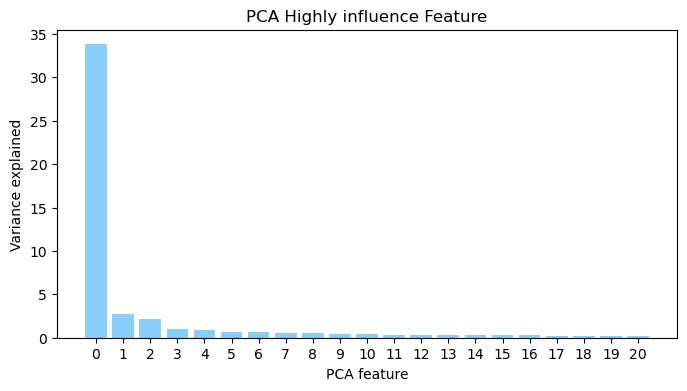

In [150]:
# Create a bar plot showing the explained variance of the first 20 principal components
plt.figure(figsize=(8,4))
plt.bar(features[:21], pca.explained_variance_[:21], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance explained')
plt.xticks(features[:21])
plt.title('PCA Highly influence Feature')
plt.show()

In [151]:
def pca_reduction(n):
    pca = PCA(n_components=n, random_state=76)
    global feature_reduction
    feature_reduction = pca.fit_transform(Feature)
    return feature_reduction

In [152]:
pca_reduction(n=1)

array([[-5.43919417],
       [-5.24480358],
       [-6.04797676],
       ...,
       [ 4.14902244],
       [ 3.74618981],
       [ 5.99142745]])

In [153]:
#Using the feature_reduction data after dimensional reduction using PCA
custom_k_means(n=2, data=feature_reduction, labels=y)

Crosstab:
 original_labels   LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
predicted_labels                                                           
0                    680      622       668        0                   0   
1                      1        1         0      603                 493   

original_labels   WALKING_UPSTAIRS  
predicted_labels                    
0                                0  
1                              541   

Performance metrics:
Inertia: 11485.288
Homogeneity: 0.384
Completeness: 0.994
V-Measure: 0.553
Silhouette Score: 0.828


/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
